## 1) MCMC : Metropolis-Hastings Algorithm

In [1]:
# first, let's see a stationary distribution and its transition kernel : (TK is given )

In [65]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
A = np.array([[1,2,3],[4,5,6],[7,8,0]])  # 行列の定義
B = np.array([[1,0,3],[2,5,0],[1,8,2]])  # (おなじ)
C = A.dot(B)

In [4]:
C

array([[ 8, 34,  9],
       [20, 73, 24],
       [23, 40, 21]])

In [5]:
# numpy は、統計分析等に必須である、行列の演算を(も)、実装したパッケージ

In [6]:
# まず、「例題」における、確率状態推移図を、そのまま確率推移行列へ
# PTM と名前をつけておく( Probability Transition Matrix )
PTM = np.array([ [1,0,0,0,0],
                [0.6,0.3,0.1,0.0,0.0],
                [0.3,0.2,0.4,0.1,0.0],
                [0.0,0.3,0.2,0.4,0.1],
                [0.0,0.0,0.1,0.1,0.8]
               ])

In [7]:
PTM

array([[1. , 0. , 0. , 0. , 0. ],
       [0.6, 0.3, 0.1, 0. , 0. ],
       [0.3, 0.2, 0.4, 0.1, 0. ],
       [0. , 0.3, 0.2, 0.4, 0.1],
       [0. , 0. , 0.1, 0.1, 0.8]])

In [8]:
BeginingStates= np.array([
    [0,0,0,0,1],
    [0,0,0,0.2,0.8],
    [0.1,0,0.4,0.2,0.3],
    [0.2,0.3,0.2,0.1,0.2],
    [0,0,0.5,0,0.5]
])

In [9]:
a1  = BeginingStates[0]

In [10]:
print(a1)

[0. 0. 0. 0. 1.]


In [11]:
A1 = np.array([BeginingStates[0]])

In [12]:
# 行列／ベクトルの演算を実行するときは、「入れ子」でないとダメ
print(A1)

[[0. 0. 0. 0. 1.]]


In [13]:
result1 = A1.dot(PTM)

In [14]:
result1

array([[0. , 0. , 0.1, 0.1, 0.8]])

In [15]:
# とりあえず、上で適当に定義した初期状態ぜんぶについて、計算してみよう
A0 =  np.array([BeginingStates[0]])
A1 =  np.array([BeginingStates[1]])
A2 =  np.array([BeginingStates[2]])
A3 =  np.array([BeginingStates[3]])
A4 =  np.array([BeginingStates[4]])

In [16]:
# では、計算
result = A1.dot(PTM)
result_history=A1
for i in range(100):
    result = result.dot(PTM)
    result_history = np.append(result_history,result,axis=0)

In [17]:
#result_history

In [18]:
df_A1_history =  pd.DataFrame(result_history)

In [19]:
df_A1_history

,0,1,2,3,4
0,0.000000,0.000000e+00,0.000000e+00,2.000000e-01,8.000000e-01
1,0.072000,9.000000e-02,1.520000e-01,1.420000e-01,5.440000e-01
2,0.171600,1.000000e-01,1.526000e-01,1.264000e-01,4.494000e-01
3,0.277380,9.844000e-02,1.412600e-01,1.107600e-01,3.721600e-01
4,0.378822,9.101200e-02,1.257160e-01,9.564600e-02,3.088040e-01
...,...,...,...,...,...
96,1.000000,6.198398e-09,7.958751e-09,5.725444e-09,1.688449e-08
97,1.000000,5.168903e-09,6.636878e-09,4.774502e-09,1.408014e-08
98,1.000000,4.310397e-09,5.534556e-09,3.981502e-09,1.174156e-08
99,1.000000,3.594481e-09,4.615318e-09,3.320212e-09,9.791398e-09


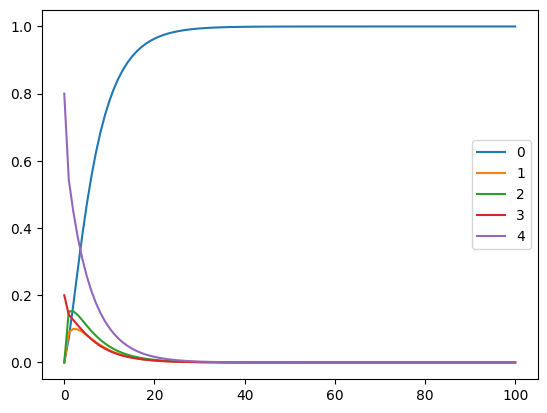

In [20]:
df_A1_history.plot()
plt.show()

In [21]:
# データフレーム生成を(一定)自動化
# 引数：推移確率行列、初期ベクトル、実時間(自然数)
def state_trans_df(ptm,init,n):
    hist=init
    for i in range(n):
        init = init.dot(ptm)
        hist = np.append(hist,init,axis=0)
    return pd.DataFrame(hist)

In [22]:
aaa = state_trans_df(PTM,A2,100)

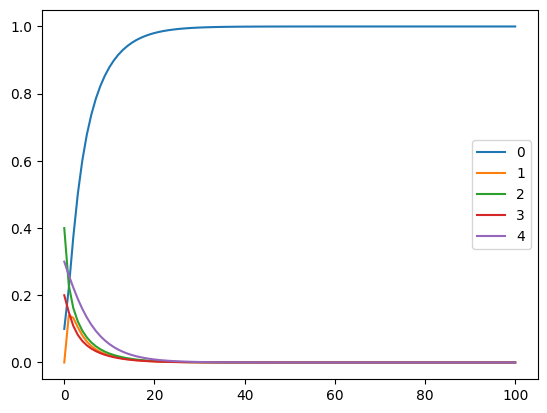

In [23]:
#aaa
aaa.plot()
plt.show()

In [24]:
bbb = state_trans_df(PTM,A1,100)
ccc = state_trans_df(PTM,A2,100)
ddd = state_trans_df(PTM,A3,100)
eee = state_trans_df(PTM,A4,100)

In [25]:
#bbb.plot()
#plt.show()
#ccc.plot()
#plt.show()
#ddd.plot()
#plt.show()
#eee.plot()
#plt.show()

In [26]:
# ほんとうはありえないわけだが：
# Δt ののち、死んだ奴の1割が、よみがえる世界を考える：
# PTM2 と名前をつけておく
PTM2 = np.array([ [0.9,0,0,0,0.1],
                [0.6,0.3,0.1,0.0,0.0],
                [0.3,0.2,0.4,0.1,0.0],
                [0.0,0.3,0.2,0.4,0.1],
                [0.0,0.0,0.1,0.1,0.8]
               ])

In [27]:
aaa = state_trans_df(PTM2,A0,100)
bbb = state_trans_df(PTM2,A1,100)
ccc = state_trans_df(PTM2,A2,100)
ddd = state_trans_df(PTM2,A3,100)
eee = state_trans_df(PTM2,A4,100)

In [28]:
#bbb.plot()
#plt.show()
#ccc.plot()
#plt.show()
#ddd.plot()
#plt.show()
#eee.plot()
#plt.show()

In [29]:
np.array(aaa.columns)

array([0, 1, 2, 3, 4])

In [30]:
#
# first, take a look at the stationary probability density : 
stt = [aaa,bbb,ccc,ddd,eee]
nst = len(np.array(aaa.columns))
#print(nst)
result = []
for i in stt :
    #print('--------')
    tmp = []
    for j in range(nst):
        #print(i[j][len(i[j])-1])
        tmp.append(i[j][len(i[j])-1])
    result.append(tmp)
result = np.round(result, decimals=6)
print(result)

[[0.521569 0.048366 0.077124 0.061438 0.291503]
 [0.521569 0.048366 0.077124 0.061438 0.291503]
 [0.521569 0.048366 0.077124 0.061438 0.291503]
 [0.521569 0.048366 0.077124 0.061438 0.291503]
 [0.521569 0.048366 0.077124 0.061438 0.291503]]


In [31]:
# so, let us use aaa's final probability as the stationary distribution(定常分布)
stationary = np.array(result[0])

In [32]:
np.sum(stationary)

np.float64(1.0)

In [33]:
# the stationary distribution needs to satisfy :
# stationary ~= stationary.dot(PTM2). 
print(stationary)
print(stationary.dot(PTM2))

[0.521569 0.048366 0.077124 0.061438 0.291503]
[0.5215689 0.048366  0.0771241 0.0614379 0.2915031]


In [34]:
PTM2

array([[0.9, 0. , 0. , 0. , 0.1],
       [0.6, 0.3, 0.1, 0. , 0. ],
       [0.3, 0.2, 0.4, 0.1, 0. ],
       [0. , 0.3, 0.2, 0.4, 0.1],
       [0. , 0. , 0.1, 0.1, 0.8]])

## ------ Here we're trying to identify Transition Kernel of this system
# using MH method

In [35]:
# stationary distribution ; this is supposed to be :
# an observation data from practical world
states = np.array([0,1,2,3,4])
# 0 : death, 1 : sevior, 2: moderate, 3 : mild, 4 : non_infected
stat_dist = np.array([
    states,
    stationary*10000  # populations for each condition
])

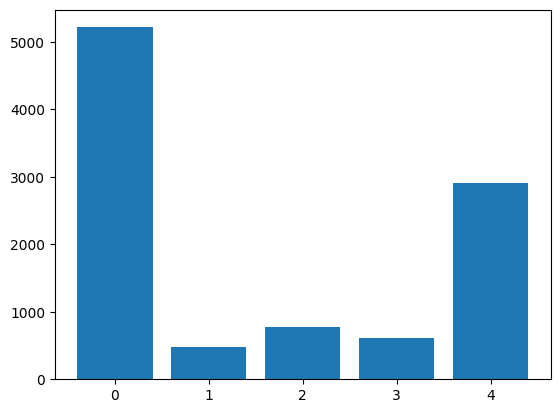

In [36]:
stat_dist
plt.bar(stat_dist[0],stat_dist[1])
plt.show()

In [37]:
# initial distribution 
init_dist = np.array([
    states,
    [1/len(states) for i in states]
])

In [38]:
# proposal transition matrix
# ... let us use a uniform distribution : that is : the metropolis Algolithm
# in which the proposal distribution is symmetric. 
ptm = np.array([
    [1/len(states) for i in states] for j in states
])

In [39]:
def valuation(x,y) :
    return stat_dist[1][y] * ptm[y][x] / stat_dist[1][x] * ptm[x][y]

In [40]:
def valuation2(x,y) :
    return stat_dist[1][x] * ptm[x][y] / stat_dist[1][y] * ptm[y][x]

In [42]:
valuation(2,0)

np.float64(0.2705093096831077)

In [41]:
# alpha
alpha = lambda x,y : min(1,valuation(x,y))

In [42]:
# here we go for the experiment ....

X = []
X0 = 4
X.append(X0) # initial state
NN = 10000

for i in range(NN):
    y = np.random.randint(0,5)
    a = alpha(X[i],y)
    u = np.random.rand() 

    if u < a: 
        X.append(y)
    else: 
        X.append(X[i])

In [43]:
SPTM = np.array([
    [ 0 for i in states ] for j in states
], dtype='float64')
for i in range(NN-1) :
    SPTM[X[i]][X[i+1]]=SPTM[X[i]][X[i+1]]+1

for i in range(len(states)) :
    s = sum(SPTM[i])
    for j in range(len(states)):
        SPTM[i][j]/=s

In [44]:
SPTM

array([[9.91951710e-01, 8.04828974e-04, 1.34138162e-03, 1.74379611e-03,
        4.15828303e-03],
       [3.03030303e-02, 8.63636364e-01, 0.00000000e+00, 1.51515152e-02,
        9.09090909e-02],
       [6.87022901e-02, 7.63358779e-03, 9.00763359e-01, 7.63358779e-03,
        1.52671756e-02],
       [1.05882353e-01, 0.00000000e+00, 0.00000000e+00, 7.88235294e-01,
        1.05882353e-01],
       [1.76834660e-02, 8.84173298e-04, 1.32625995e-03, 1.32625995e-03,
        9.78779841e-01]])

In [45]:
h,b = np.histogram(X,bins=[0,1,2,3,4,5])

[7455   66  131   85 2264]


<BarContainer object of 5 artists>

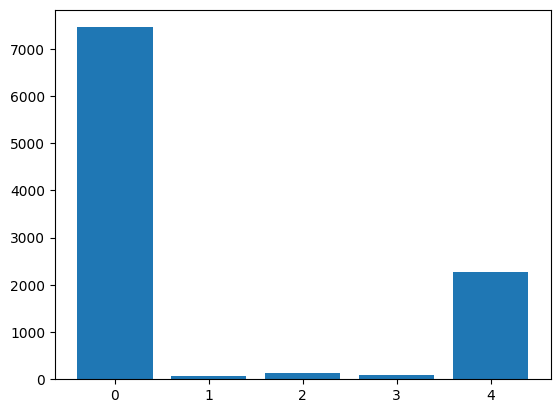

In [46]:
print(h)
plt.bar(states,h)
#plt.bar(h[0],h[1])

In [47]:
h.dot(SPTM)

array([7455.03536693,   66.00176835,  131.00265252,   85.00265252,
       2263.95755968])

## ----------------------------------------

## 2) Gibbs Sampler : what if ; we want to sample from joint distribution which we can't identify 
## the density function itself but able to use conditional distributions...

In [2]:
#np.random.binomial(1,0.2)

In [69]:
firstin = lambda a, x : [x] + a
lastin = lambda a, x: a + [x]

In [66]:
def gen_dist(a,n) :  # descrete probability distribution generator: 
    # used for generating marginal distributions 
    # a in (0,1]
    # n : the num. of partitions in (0,a), which indicates the cases of random var.
    tmp = [np.random.uniform(0,a) for i in range(n-1) ]
    tmp.append(a)
    tmp.insert(0,0)
    tmp2 = np.sort(tmp)
    #print(tmp2)
    return np.array([tmp2[j+1]-tmp2[j] for j in range(n)])

In [71]:
ee = gen_dist(1,5)

In [73]:
np.sum(ee)

np.float64(1.0)

In [3]:

def firstout(a) : # first out
    r = a[0]
    aa = a[1:].copy()
    return r,aa

def lastout(a) :
    r = a[len(a)-1]
    aa = a[:len(a)-1]
    return r,aa

In [75]:
# first, let's generate a 3-d joint distribution
# first we need to generate probability one by one to fulfill 
# 3-d parallelepiped
dd = np.array([3,5,4])
ss = gen_dist(1,np.prod(dd))
state = [0,0,0] # initial state. from here the Markov Chain begins

In [76]:
# then, let's fill it with the data generated above
# the name is Joint3d
Joint3d = []
cc = 0
for l in range(dd[0]):
    t1 = []
    for k in range(dd[1]):
        t2 = []
        for j in range(dd[2]):
            t2.append(ss[cc])
            cc+=1
        t1.append(t2)
    Joint3d.append(t1)

In [6]:
#Joint3d[0][:][:]

In [69]:
#dd = np.array([3,5,4])

In [107]:
# random val.s : 3
# conditional distributions case 1) : 
# we only know one dimmentional random val's distribution when other two random vals' are fixed 

In [77]:
# marginal distribution 
mX = lambda y,z,j : [j[i][y][z] for i in range(np.shape(j)[0])]
mY = lambda x,z,j : [j[x][i][z] for i in range(np.shape(j)[1])]
mZ = lambda x,y,j : [j[x][y][i] for i in range(np.shape(j)[2])]

In [78]:
mZ(2,1,Joint3d)

[np.float64(0.011243481925463983),
 np.float64(0.005134954764145605),
 np.float64(0.012471661055429961),
 np.float64(0.027663547084496032)]

In [79]:
def random_01(p) :
    # p should be an array of positive reals, which sum is 1
    # returns the partition of [0,1], as an array like [0,0.2,0.5,0.8,1]
    # in which case p = [0.2,0.3,0.3,0.2]
    r = []
    t = 0
    for i in p:
        t+=i
        r.append(t)
    #r.insert(0,0)
    return firstin(r,0)

In [80]:
random_01([.2,.3,.4,.1])
#firstin([1,2,3],0)

[0, 0.2, 0.5, 0.9, 1.0]

In [32]:
#mX(4,3,Joint3d)
np.shape(Joint3d)

(3, 5, 4)

In [81]:
# frequency matrix
freq3d = np.array([[[0 for i in range(dd[2])] for j in range(dd[1])] for k in range(dd[0])])

In [34]:
# moving x axis ...
ss = [0,0,0]
random_01([mX(ss[1],ss[2],Joint3d)[i]/np.sum(mX(ss[1],ss[2],Joint3d)) for i in range(len(Joint3d[:]))])
#random_01([mY(ss[0],ss[2],Joint3d)[i]/np.sum(mY(ss[0],ss[2],Joint3d)) for i in range(len(Joint3d[0][:]))])
#random_01([mZ(ss[0],ss[1],Joint3d)[i]/np.sum(mZ(ss[0],ss[1],Joint3d)) for i in range(len(Joint3d[0][0][:]))])

[0,
 np.float64(0.8549271169901943),
 np.float64(0.960177158594422),
 np.float64(1.0)]

In [86]:
#mZ(ss[0],ss[1],Joint3d)[3]/np.sum(mZ(ss[0],ss[1],Joint3d))
len(Joint3d[2][0][:])
#len(Joint3d[2][:])
#len(Joint3d[2])

4

In [87]:
eval_interval = lambda a,b,x : True if a<x and x<=b else False

In [64]:
# test ....
xxx = random_01([mX(ss[1],ss[2],Joint3d)[i]/np.sum(mX(ss[1],ss[2],Joint3d)) for i in range(len(Joint3d[:]))])
yyy = random_01([mY(ss[0],ss[2],Joint3d)[i]/np.sum(mY(ss[0],ss[2],Joint3d)) for i in range(len(Joint3d[0][:]))])
zzz = random_01([mZ(ss[0],ss[1],Joint3d)[i]/np.sum(mZ(ss[0],ss[1],Joint3d)) for i in range(len(Joint3d[0][0][:]))])
j=0
p=np.random.rand()
print(yyy)
print(p)
for i in range(len(yyy)-1):
    if eval_interval(yyy[i],yyy[i+1],p):
        print(j)
        break
    j+=1
print(j)  #; print(zzz[i])
    

[0, np.float64(0.4377248116613328), np.float64(0.674018130580165), np.float64(0.8290654569916978), np.float64(0.935395525306131), np.float64(0.9999999999999999)]
0.9369017951005925
4
4


In [88]:
# Markov Chain generation : 

def moving(s,j,flag) : 
    # s : present state
    # j : joint distribution matrix
    # flag : 0-> x move, 1-> y move, 2->z move
    sss = np.copy(s)
    match flag :
        case 0: # x axis
            xx = random_01([mX(s[1],s[2],j)[i]/np.sum(mX(s[1],s[2],j)) for i in range(len(j[:]))])
            pp = np.random.rand()
            ii=0
            for k in range(len(xx)-1):
                if eval_interval(xx[k],xx[k+1],pp):
                    break
                ii=ii+1
            sss[0]=ii
        case 1: # y axis
            yy = random_01([mY(s[0],s[2],j)[i]/np.sum(mY(s[0],s[2],j)) for i in range(len(j[0][:]))])
            pp = np.random.rand()
            ii=0
            for k in range(len(yy)-1):
                if eval_interval(yy[k],yy[k+1],pp):
                    break
                ii=ii+1
            sss[1]=ii
        case 2: # z axis 
            zz = random_01([mZ(s[0],s[1],j)[i]/np.sum(mZ(s[0],s[1],j)) for i in range(len(j[0][0][:]))])
            pp = np.random.rand()
            ii=0
            for k in range(len(zz)-1):
                if eval_interval(zz[k],zz[k+1],pp):
                    break
                ii=ii+1
            sss[2]=ii
    return sss

In [125]:
moving([1,3,1],Joint3d,0)

array([2, 3, 1])

In [400]:
# test ....
ss = [0,0,0]
r = []
for kk in range(100):
    d = np.mod(kk,3)
    ss = moving(ss,Joint3d,d)
    r.append(ss)

In [126]:
# Prepareing for Frequency container ...
Freq = []

for l in range(dd[0]):
    t1 = []
    for k in range(dd[1]):
        t2 = []
        for j in range(dd[2]):
            t2.append(0)
        t1.append(t2)
    Freq.append(t1)


In [127]:
# =================== Now, it's the time of Experiment ======================
ss = [0,0,0] # initial state
nn = 10000 # Markov Chain Length
for kk in range(nn):
    d = np.mod(kk,3)
    ss = moving(ss,Joint3d,d)
    #r.append(ss)
    Freq[ss[0]][ss[1]][ss[2]] = Freq[ss[0]][ss[1]][ss[2]]+1


In [128]:
Freq = Freq/np.sum(Freq)

In [131]:
Joint3d[2][3]
# generation of the axis of  'next' state
#bx = lambda pp : np.random.binomial(len(Joint3d[:][0][0])-1,pp)

[np.float64(0.003136346777105281),
 np.float64(0.0173358712166366),
 np.float64(0.0651489207057353),
 np.float64(0.002439482293231987)]

In [132]:
Freq[2][3]

array([0.0032, 0.0146, 0.0662, 0.0034])

# ---------------------------------------------------------------

In [125]:
# the simplest case : 2-d
# joint distribution matrix :: this case is the simplest one : 2 X 2 
Joint = np.array(
    [[0.6,0.1],  # X = 0 
     [0.15,0.15] # X = 1
    ])

In [126]:
# marginal distributions
mY = lambda i,j : sum(j[:,i])
mX = lambda i,j : sum(j[i])

In [127]:
mX(1,Joint)

np.float64(0.3)

In [128]:
Joint[1,0]/mX(1,Joint)

np.float64(0.5)

In [129]:
# let's check the simple-sample of Bernoulli process
bernoulli = lambda pp : np.random.binomial(1,pp)

In [130]:
bernoulli(mY(0,Joint))

1

In [131]:
# sampling X ;
# two-dimmentional 
def smplX_Ygiven( yy,j ) :
    xx = bernoulli(j[1,yy]/mY(yy,j))
    return xx
# -------------------
# sampling Y :
def smplY_Xgiven( xx,j ) :
    yy = bernoulli(j[xx,1]/mX(xx,j))
    return yy

In [132]:
smplY_Xgiven(0,Joint)

0

In [133]:
def gibbs2d(n,pp,j): # n : iteration time, pp : initial state
    # when invoking this function, it is supposed that 
    # the table of joint distribution is to be defined. 
    # n is the iteration time. returns the array of 
    # generated data
    # pp : initial state
    # j : 2-dimmentional joint matrix
    nn = n
    r=[]
    r.append(pp)
    #y = bernoulli(0.5)
    for i in range(nn): 
        x = smplX_Ygiven(r[i][1],j)
        y = smplY_Xgiven(x,j)
        #print(x)
        r.append([x,y])
    return r        


In [134]:
result = gibbs2d(1000,[0,1],Joint)

In [213]:
#result

In [135]:
freq = np.array([
    [0,0],
    [0,0]
])
for i in range(len(result)):
    if result[i] == [0,0] :
        freq[0,0]+=1
    elif result[i] == [0,1] : 
        freq[0,1]+=1
    elif result[i] == [1,0] :
        freq[1,0]+=1
    else :
        freq[1,1]+=1

In [136]:
np.sum(freq)

np.int64(1001)

In [137]:
freq = freq/np.sum(freq)

In [138]:
freq

array([[0.60739261, 0.08391608],
       [0.16183816, 0.14685315]])